# Deep Learning Theoretical Aspects - Assignment 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import sklearn
%matplotlib inline

Much of the power of neural networks comes from the nonlinearity that is inherited in activation functions.  
Show that a network of N layers that uses a linear activation function can be reduced into a network with just an input and output layers.


With linear activation function, each layer is essentially a multiplication of inputs matrix (+bias) by a weight matrix:

$$Out = w^{T} \cdot x$$

Multiple layers are essentially multiple matrix multiplcations, and thay are equal to single matrix multiplication. Let's demonstrate it:

For k layers, with weight matrix Wi in each layer, the network output will be:
$$w^{T}_{k} \cdot \cdot \cdot \left( w^{T}_{2} \cdot \left( w^{T}_{1} \cdot x\right)\right)$$

We can multiply all weight matrices and we wil see that the result is a single matrix multiplication of the input:
$$Out = w^{T} \cdot x$$

That means that the result can be reduced to a network with a single layer, that we needed to show.

### Derivatives of Activation Functions
Compute the derivative of these activation functions:

1 Sigmoid
$f(t)=\frac{1}{1+exp^{-t}}$

$$f'( t) =\left(\frac{1}{1+e^{-t}}\right) '\ =\ \frac{-1}{\left( 1+e^{-t}\right)^{2}} \cdot \left( 1+e^{-t}\right) '=\ \frac{-1}{\left( 1+e^{-t}\right)^{2}} \cdot \left( -e^{-t}\right) =\frac{e^{-t}}{\left( 1+e^{-t}\right)^{2}}$$

We could stop here, but there's a way to make that expression nicer:

$$\frac{e^{-t}}{\left( 1+e^{-t}\right)^{2}} =\frac{e^{-t}}{\left( 1+e^{-t}\right)} \cdot \frac{1}{\left( 1+e^{-t}\right)} =\frac{e^{-t}}{\left( 1+e^{-t}\right)} \cdot f( t) =\left( 1-\frac{1}{1+e^{-t}}\right) \cdot f( t) =( 1-f( t)) \cdot f( t)$$

2 Relu 

$f(x) = max(x,0)$


$$f'( x) =\begin{cases}
0 & if\ x< 0\\
1 & if\ x  >0\\
undefined & if x=0
\end{cases}$$

3 Softmax
$\sigma(z)_j = \frac{e^{z_j}}{\sum_{k=1}^K{e^z_k}}$

Let's do replacement: $f=e^{z_j}$ , $g=\sum_{k=1}^K e^{z}_k$ , $x = z_i$ then we have: $\frac {\partial f}{\partial x} = \frac {\partial e^{z_j}}{\partial z_i}= e^{z}_k \delta_{ik}$ and $\frac {\partial g}{\partial x} = \sum \frac {\partial e^{z_j}}{\partial z_i}= \sum e^{z_j} \frac{\partial z_j}{z_i} = e^x_i$ then applying quotient rule : $$\frac{\partial \sigma ( z)_{j} \ }{\partial z_{j}} = \frac{\frac{\partial f}{\partial z}f-\frac{\partial g}{\partial z}f}{g^2} = \frac{e^{z_j}\delta_{ij}\sum e^{z_k}-e^{z_i}e^{z_j}}{(\sum e^{x_k})^2}=\sigma(z)_j\delta_{ij} - \sigma(z)_i\sigma(z)_j=\sigma(z)_j(\delta_{ij}-\sigma(z)_i)$$

### Back Propagation
Use the delta rule and backprop to compute the derivatives for these computations:

```
z = x1 + 5*x2 - 3*x3^2
```

$$\begin{array}{l}
\frac{\partial z\ }{\partial x_{1}} =\ 1\\
\frac{\partial z\ }{\partial x_{2}} =\ 5\\
\frac{\partial z\ }{\partial x_{3}} =\ -6x_{3}
\end{array}$$

Building a backpropagation calculation diagram for X = (2,3,4) results in local gradients of (1, 5, -24):

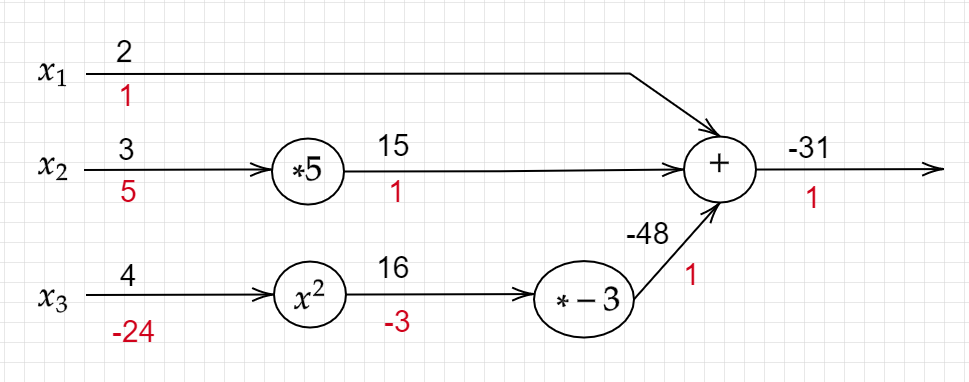

```
z = x1*(x2-4) + exp(x3^2) / 5*x4^2
```

$$\begin{array}{l}
\frac{\partial z\ }{\partial x_{1}} =\ x_{2} -4\\
\frac{\partial z\ }{\partial x_{2}} =\ x_{1}\\
\frac{\partial z\ }{\partial x_{3}} =\ \frac{2x_{3} \cdot e^{x^{2}_{3}}}{5x^{2}_{4}}\\
\frac{\partial z\ }{\partial x_{4}} =\ \frac{-2e^{x^{2}_{3}}}{5x^{3}_{4}}
\end{array}$$

```
z = 1/x3 + exp( (x1+5*(x2+3)) ^2 )
```

$$ \begin{array}{l}
\frac{\partial z\ }{\partial x_{1}} =\ 2( x_{1} +5( x_{2} +3)) \cdot e^{( x_{1} +5( x_{2} +3))^{2}}\\
\frac{\partial z\ }{\partial x_{2}} =\ 10( x_{1} +5( x_{2} +3)) \cdot e^{( x_{1} +5( x_{2} +3))^{2}}\\
\frac{\partial z\ }{\partial x_{3}} =\ \frac{-1}{x^{2}_{3}}
\end{array}$$

#### Gradient Checking
When computing the gradient yourself, it's recommended to manually check the gradient to make sure you haven't made an error.  
We'll use the following equation for this, which produces more robust results than the standard definition of a derivative:


<img src="http://ufldl.stanford.edu/wiki/images/math/a/2/3/a23bea0ab48ded7b9a979b68f6356613.png" width="250">

We'll numerically approximate it using:

<img src="http://ufldl.stanford.edu/wiki/images/math/4/8/a/48a000aed96c8595fcca2a45f48343ce.png" width="250">

Write a function that evaluates the gradient locally and use it to numerically compute the gradient along several randomly chosen dimensions. Compare your results with your analytically computed gradient. The numbers should match almost exactly along all dimensions.

In [104]:
def approximate_gradients(func, *args):
    eps = np.finfo(np.float32).eps
    gradients = []
    # calculate gradient along each dimention / parameter
    for arg_num in range(len(args)):
        args_plus_epsilon = list(args)
        args_plus_epsilon[arg_num] = args[arg_num]+eps
        args_minus_epsilon = list(args)
        args_minus_epsilon[arg_num] = args[arg_num]-eps
        current_grad = (func(*args_plus_epsilon)-func(*args_minus_epsilon))/(2*eps)
        gradients.append(current_grad)
    return gradients

In [105]:
# Gradient approximation for the first function, assuming the input values are 2,3,4
def z1(*args):
    # z = x1 + 5*x2 - 3*x3^2
    return args[0] + 5*args[1] - 3*args[2]**2

approximate_gradients(z1,2,3,4)

[1.0, 5.0, -24.0]

The numerical approximation above is equal to analytical gradients

In [106]:
# Gradient approximation for the second function, assuming the input values are 1,2,3,4
def z2(*args):
    # z = x1*(x2-4) + exp(x3^2) / 5*x4^2
    return args[0]*(args[1]-4) + np.exp(args[2]**2) / (5*args[3]**2)

approximate_gradients(z2,1,2,3,4)

[-2.0, 1.0, 607.7312945723534, -50.64427453279495]

The numerical approximation above is equal to analytical gradients

In [107]:
# Gradient approximation for the third function, assuming the input values are 3,1,-2
def z3(*args):
    # z = 1/x3 + exp( (x1+5*(x2+3)) ^2 )
    return 1/args[0] + np.exp((args[1]+5*(args[2]+3))**2)

approximate_gradients(z3,3,1,-2)

[0.0, 5.173477856457523e+16, 2.586738928291676e+17]

Analytical gradient of x1 in above function should be -1/x1^2 or -1/9, but the numerical approximation shows 0 because this gradiant is so much smaller than the other two, it's impact is lost during numeric approximation. If we would use a much smaller value for x1, that has a larger gradient, our numerical approximation will be able to detect it:

In [108]:
approximate_gradients(z3,0.0001,1,-2)

[-100663296.0, 5.173477856457523e+16, 2.586738928291676e+17]

### Puppy or bagel?
We've seen in class the (hopefully) funny examples of challenging images (Chihuahua or muffin, puppy or bagel etc.). 

Let's say you were asked by someone to find more examples like that. You are able to call the 3 neural networks that won the recent ImageNet challenges, and get their predictions (the entire vector of probabilities for the 1000 classes).  

Describe methods that might assist you in finding more examples.

1. Build a consusion matrix on the results of each network, so we have 3 confusion matrices, 1000x1000 each
2. Normalize the matrices, so that sum of values in each row will be equal to 1
3. Define a cutoff threshold, that determines what level of similarity is required. For example, we can set t=0.2
4. For each confusion matrix, find pairs of indices i,j such that Cij > t and Cji > t (i <> j). These paris are classes that the network is confused about.
5. Return an intersection of the pairs, so that only pairs that confuse all 3 networks are listed

See a short example in code below. Assumptions:
* We have only 3 classes, and each class has 100 images. 
* We only have 2 networks and we already have their confusion matrices c1 & c2.

In [120]:
# First network only shows one confusing pair: classes 0 and 1
c1 = np.array([[70, 28, 2], [25, 75, 0], [0, 1, 99]])
c1

array([[70, 28,  2],
       [25, 75,  0],
       [ 0,  1, 99]])

In [122]:
# Second network shows 2 confusing pairs: classes 0 and 1 and classes 0 and 2
c2 = np.array([[57, 22, 21], [30, 70, 0], [30, 1, 69]])
c2

array([[57, 22, 21],
       [30, 70,  0],
       [30,  1, 69]])

In [187]:
t = 0.2

def get_pairs(matrix, threshold):
    normalized_matrix = matrix / matrix.sum(axis=1)
    mask = normalized_matrix > threshold
    np.fill_diagonal(mask, 0)
    pairs = []
    classes = matrix.shape[0]
    for row in range(classes):
        for col in range(row):
            if mask[row, col] & mask[col, row]:
                pairs.append((row, col))
    return pairs

pairs1 = get_pairs(c1, t)
pairs2 = get_pairs(c2, t)
final_pairs = list(set(pairs1) & set(pairs2))
print('The pairs found in network 1 are:', pairs1)
print('The pairs found in network 2 are:', pairs2)
print('The pairs that appear in every network are:', final_pairs)

The pairs found in network 1 are: [(1, 0)]
The pairs found in network 2 are: [(1, 0), (2, 0)]
The pairs that appear in every network are: [(1, 0)]


### Sample convolutions
Consider the following convolution filters:
```python
k1 = [ [0 0 0], [0 1 0], [0 0 0] ]
k2 = [ [0 0 0], [0 0 1], [0 0 0] ]
k3 = [ [-1-1 -1], [-1 8 -1], [-1 -1 -1] ]
k4 = [ [1 1 1], [1 1 1], [1 1 1] ] / 9
```

Can you guess what each of them computes?

In [189]:
k1 = np.array([ [0, 0, 0], [0, 1, 0], [0, 0, 0] ])
k2 = np.array([ [0, 0, 0], [0, 0, 1], [0, 0, 0] ])
k3 = np.array([ [-1,-1, -1], [-1, 8, -1], [-1, -1, -1] ])
k4 = np.array([ [1, 1, 1], [1, 1, 1], [1, 1, 1] ]) / 9

In [190]:
k1

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 0]])

This convolution takes only the central pixel. When it will be applied on the image, it will leave it as it is, but will "skip" the edges of the image (1 pixel from each side).

In [192]:
k2

array([[0, 0, 0],
       [0, 0, 1],
       [0, 0, 0]])

This convolution focuses on the right middle pixel only. When applied on an image, it will shift the image by 1 pixel.

In [193]:
k3

array([[-1, -1, -1],
       [-1,  8, -1],
       [-1, -1, -1]])

This convolution should highlight cases when the central pixel is different from the surrounding pixels

In [194]:
k4

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

This convolution "averages" the image, probably blurring it

#### Apply to arrays
Apply the convolutions above to the following array:


In [195]:
x = np.array([[-1, -3, -4,  0, -1],
       [ 2, -2, -4,  0, -2],
       [-3, -2,  2,  2,  3],
       [ 0, -3, -4, -4, -2],
       [-4, -2,  2,  0,  1]])

In [220]:
x

array([[-1, -3, -4,  0, -1],
       [ 2, -2, -4,  0, -2],
       [-3, -2,  2,  2,  3],
       [ 0, -3, -4, -4, -2],
       [-4, -2,  2,  0,  1]])

In [217]:
# we assume stride of 1 and rectangular filter
def apply_conv(matrix, convolution):
    xdim = matrix.shape[1]
    ydim = matrix.shape[0]
    f = convolution.shape[0] # filter size in every dimention
    activation_map = np.zeros((ydim-f+1, xdim-f+1)) # this matrix will store the result of all convolutions
    for row in range(ydim-f+1):
        for col in range(xdim-f+1):
            # take filter-sized rectange that convolution will be applied on
            rectangle_to_apply_on = matrix[row:row+f, col:col+f]
            conv_result = (rectangle_to_apply_on * convolution).sum()
            activation_map[row, col] = conv_result
    return activation_map

In [219]:
apply_conv(x, k1)

array([[-2., -4.,  0.],
       [-2.,  2.,  2.],
       [-3., -4., -4.]])

In [221]:
apply_conv(x, k2)

array([[-4.,  0., -2.],
       [ 2.,  2.,  3.],
       [-4., -4., -2.]])

In [222]:
apply_conv(x, k3)

array([[ -3., -25.,   4.],
       [ -4.,  33.,  27.],
       [-13., -27., -36.]])

In [223]:
apply_conv(x, k4)

array([[-1.66666667, -1.22222222, -0.44444444],
       [-1.55555556, -1.66666667, -1.        ],
       [-1.55555556, -1.        ,  0.        ]])

#### Apply to images
Apply the convolution filters above on the image. Plot the results:

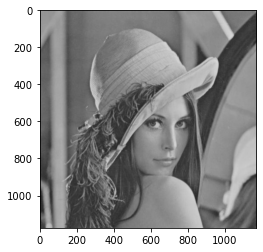

In [224]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
im = mpimg.imread('lena.jpg')
plt.imshow(im)

We have found that this is truly a grayscale image that is saved with 3 identical RGB channels.

Therefore, we will only use one channel for applying the convolution, because all 3 channels are identical.

In [241]:
img_matrix = im[:,:,0]

In [245]:
k1_result = apply_conv(img_matrix, k1)

In [251]:
img_matrix.shape, k1_result.shape

((1175, 1170), (1173, 1168))

We can see that the convolution activation map size is as expected: 2 pixels less in every dimension (w-3+1)

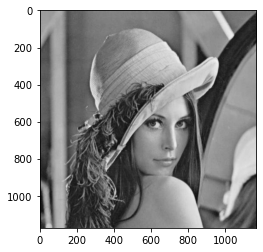

In [252]:
plt.imshow(k1_result, cmap='gray');

As expected, k1 convolution didn't change the image but only cut the borders (we can't notice it visually)

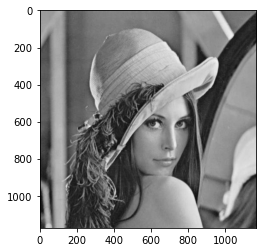

In [253]:
k2_result = apply_conv(img_matrix, k2)
plt.imshow(k2_result, cmap='gray');

Here the image is cut 2 pixels on the left, no pixels on the right, 1 from top and one from bottom. Otherwise, it stays the same.

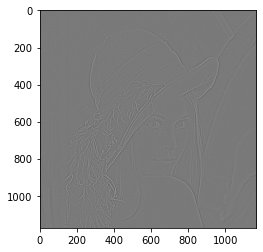

In [254]:
k3_result = apply_conv(img_matrix, k3)
plt.imshow(k3_result, cmap='gray');

Here, the convolution finally does something useful - edge detection. It's a bit hard to see it due to the low contrast (small values), but the network will still be able to learn to use it. 

Let's try to improve the image results (just for our visual perception):

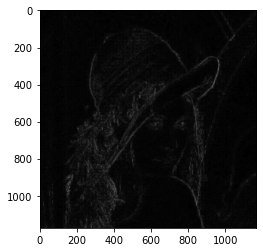

In [280]:
k3_norm = np.abs(k3_result) # both hightly negative and hightly positive results are meaningful for us, as both are edges
k3_norm = k3_norm / k3_norm.max() # transform all values to be between 0 and 1
plt.imshow(k3_norm, cmap='gray', vmin=0, vmax=1);

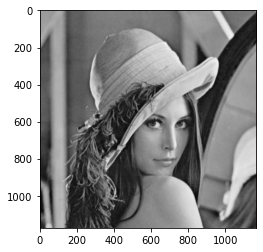

In [282]:
k4_result = apply_conv(img_matrix, k4)
plt.imshow(k4_result, cmap='gray');

We don't see much difference visually, but the network will be able to use it.

For example, let's show a few examples of simple linear combinations of above convolutions. 

As we can see, it is indeed a useful information for the next layers.

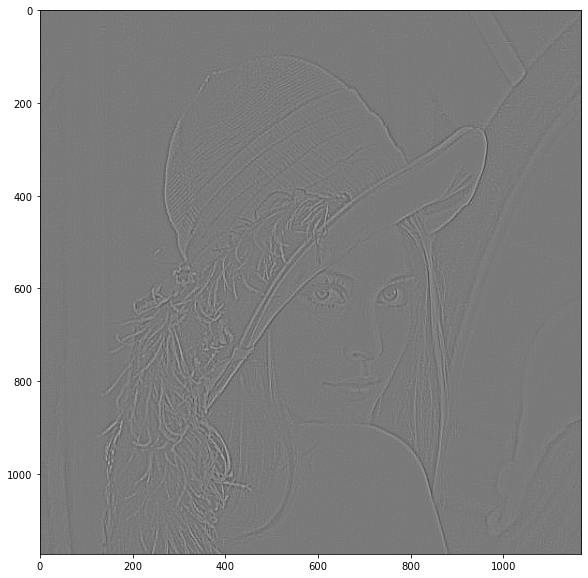

In [290]:
plt.figure(figsize=(10,10))
plt.imshow(k1_result - k4_result, cmap='gray');

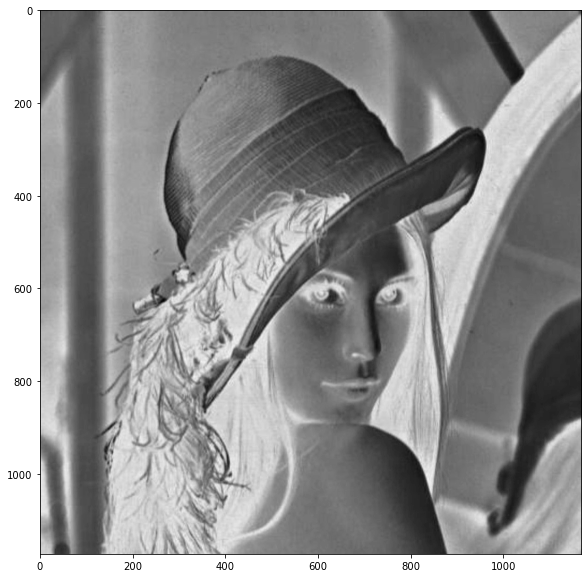

In [297]:
plt.figure(figsize=(10,10))
plt.imshow(0.5*k1_result - 1.5*k2_result, cmap='gray');

## Following Week 3
**(Note: We'll learn the material needed to complete this section on Week 3)**

What would be the output dimensions in these cases?
1. No padding, stride of 1
1. No padding, stride of 2
1. Zero padding, stride of 1
1. Zero padding, stride of 2

Assuming kernel size of 3x3, and assuming dimentions of input image are (X,Y), output size will be:
1. X-2, Y-2
2. (X-3)/2+1, (Y-3)/2+1
3. X, Y
4. (X-1)/2+1, (Y-1)/2+1

Consider convolutions with kernels of size 3x3, 5x5, 7x7 etc.

Come up with an equation for the dimension of the output image after a convolution layer. Your equation should also take into account padding and the stride.

size_in_one_dimention = (width - kernel_size + 2 * padding) / stride + 1

### Network dimensions
Write below the dimensions and number of parameters in each layer of this network for the MNIST data:

- Convolutional Layer #1: Applies 32 5x5 filters (extracting 5x5-pixel subregions), with ReLU activation function
- Pooling Layer #1: Performs max pooling with a 2x2 filter and stride of 2 (which specifies that pooled regions do not overlap)
- Convolutional Layer #2: Applies 64 5x5 filters, with ReLU activation function
- Pooling Layer #2: Again, performs max pooling with a 2x2 filter and stride of 2
- Dense Layer #1: 1,024 neurons, with dropout regularization rate of 0.4 (probability of 0.4 that any given element will be dropped during training)
- Dense Layer #2 (Logits Layer): 10 neurons, one for each digit target class (0–9).


| Layer | Layer Details | Input Dim | Output Dim | Parameters |
| --- | --- | --- | --- | --- |
| Conv 1 | 32 5x5 filters | 28x28 | 32x24x24 | 32*(5x5+1) = 832
| Pool 1 | 2x2, stride 2 | 32x24x24 | 32x12x12 | 0
| Conv 2 | 64 5x5 filters | 32x12x12 | 64x8x8 | 64*(5x5x32+1) = 51,264
| Pool 2 | 2x2, stride 2 | 64x8x8 | 64x4x4 | 0
| Dense 1 | 1024 neurons | 64x4x4=1024 (flattened) | 1024 | 1024*(1024+1)=1,049,600
| Dense 2 | 10 neurons | 1024 | 10 | 10*(1024+1)=10,250
